<hr style="height:0px; visibility:hidden;" />

<h1><center>4. Sequencing Data QC</center></h1>

<div class="alert alert-block alert-success">
Sequencing data QC (quality control) is an essential step in virtually all <a href="https://github.com/nasa/GeneLab-Training/tree/main/GL4U">GL4U</a> 'omics-specific module sets. So here we are going to quickly introduce the two most common sequencing formats and one of the most widely used tools for assessing and summarizing sequence quality. 🙂
</div>

---

<center>This is notebook 4
of 4 of <a href="../00-overview.ipynb">GL4U's Introduction Module Set</a>. It is expected that the previous notebooks have been completed already.</center>

---

[**Previous:** 3. R intro](03-R-intro.ipynb)
<br>

<div style="text-align: right"><a href="../00-overview.ipynb"><b>Back to:</b> Overview</a></div>

---
---

# Table of Contents

* [1. Common sequencing formats](#common-sequencing-formats)
    * [Fasta format](#fasta)
    * [Fastq format](#fastq)
* [2. FastQC](#fastqc)

---
---

<a class="anchor" id="common-sequencing-formats"></a>

# 1. Common sequencing file formats

Two of the most common file formats for storing sequence information are fasta and fastq.

<a class="anchor" id="fasta"></a>

## Fasta format

*Fasta* is a format that holds sequencing data. It commonly has the extensions ".fasta" or ".fa" for nucleotide sequences, and usually ".faa" for amino-acid sequences. 

By definition, each sequence (or entry) in a fasta file needs to have 2 lines, where:

1. Line 1 must begin with a ">" character followed by a unique identifier
2. Line 2 contains the sequence

Here is an example of a nucleotide fasta file showing 2 entries:

> ```
> >seq_1
> ATGCGACCTCAAGCTACGAGGCTACTATAGTCATGCTGC
> >seq_2
> TCCGACTTCAAGCTAATGCTACCTACGAGGATTAA
> ```

<br>

<a class="anchor" id="fastq"></a>

## Fastq format

*Fastq* is a format that holds nucleotide sequencing data and that sequence's associated quality scores (described below). Fastq formatted files typically have the extensions ".fastq" or ".fq". This is the format raw reads from a sequencer are typically stored in.

In fastq format, each entry is comprised of 4 lines:

1. Line 1 must begin with an '@' character followed by a unique identifier, and if these are reads from a sequencer, this identifier will typically include information about the sequencing run such as the sequencing platform, run number, flow cell ID and cluster location, and other information
2. Line 2 contains the sequence, written as base calls (A, T, C, G, or possibly an N representing any base if the base is uncertain)
3. Line 3 must start with a '+' character, and can contain additional information, but usually doesn't
4. Line 4 contains the quality scores corresponding to each base in line 2, there should always be one quality score for each base in the sequence

Here is an example of a single entry in a fastq file:

> ```
> @J00113:162:H7W32BBXX:1:1101:9658:1947 1:N:0:GGTGCG
> GTCAGTATCATGCTGCGGCTTCAAATCCGAAGTGATGTTTTGATGTGAAGTGAA
> +
> AAFFFJJJAAAAFAFFAFJAAAFJJJJJFFFJFFFJJFFJJJJJJJJJJJJJJJ
> ```

<br>

### Quality scores in fastq format

When sequencers attempt to read the "sequence" of DNA bases, for each base they read, information about the confidence of that base being correct is captured in a quality score. These are known as [Phred quality scores](https://en.wikipedia.org/wiki/Phred_quality_score). 

These scores typically range from 0-42, with higher values meaning greater confidence that the base is correct. This is a logarithmic scale, such that, e.g., if a base has an associated quality score of 20, there is an estimated 1 in 100 chance that it is incorrect; if it has a quality score of 30, there is an estimated 1 in 1,000 chance it is incorrect. Here is a summary table from the [wiki](https://en.wikipedia.org/wiki/Phred_quality_score):

<center>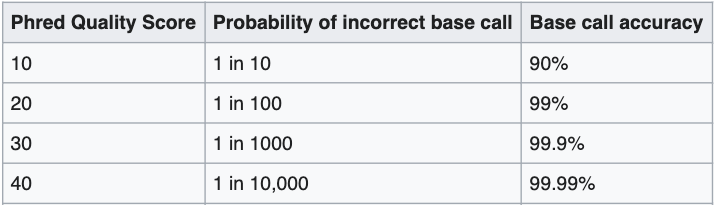</center>
<br>

To save space, in a fastq file, these numeric scores are encoded as single [ASCII](https://en.wikipedia.org/wiki/ASCII) characters, converted as described [here](http://drive5.com/usearch/manual/quality_score.html). 

<a class="anchor" id="fastqc"></a>

# 2. FastQC

Assessing the quality of fastq data is typically an essential step in the processing of sequencing data. For instance, when working with raw reads, it is important for determining if and how the reads need to be quality filtered and trimmed.

[FastQC](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/) is a widely used program for the assessment of fastq data. It checks and summarizes several different aspects of our data (which it refers to as modules), with the documentation for each linked on [this page](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/) and summarized below with example figures for some:

- [**Basic statistics**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/1%20Basic%20Statistics.html)
  - general information including total sequences, sequence length, and %GC

<center>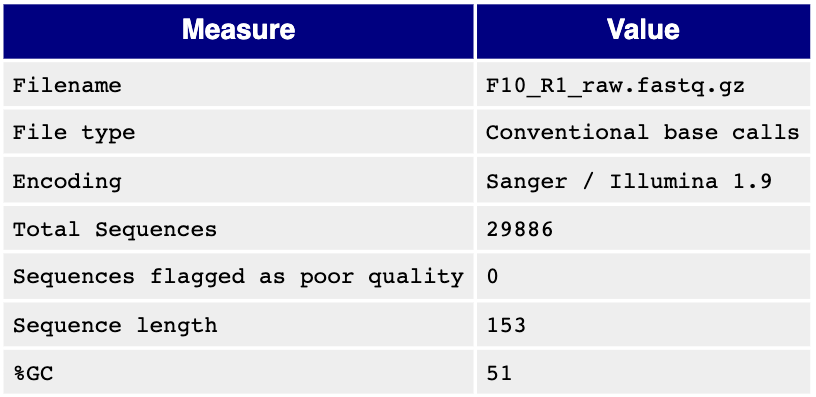</center>
<br>

- [**Per base sequence quality**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/2%20Per%20Base%20Sequence%20Quality.html)
  - an overview of all quality scores plotted as boxplots across the length of the reads
    - where the x-axis is position in the reads, the y-axis is quality score, red lines are medians, and the blue line is the mean
  
<center>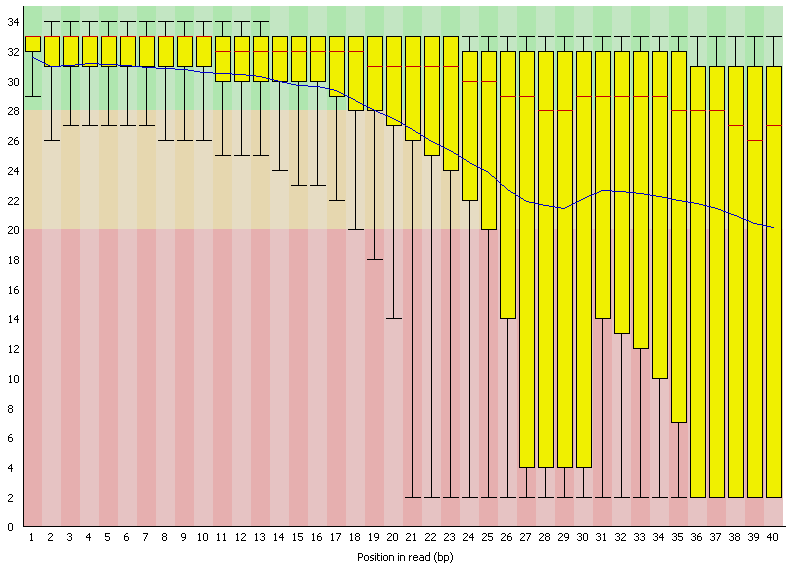</center>
<br>

**Looking at the quality score plot above:**

1. What is roughly the average quality score at base position 20?

2. What do you notice about the quality of the reads at the start vs at the end?

3. It is hard to know if we aren't used to seeing what quality profiles typically look like yet, but do you think these reads are of high quality? Could they be after quality filtering?

<div class="alert alert-block alert-success">
<details>
<summary><b>Q1 Solution</b></summary>

<br>
The blue line indicates the mean, which is around 27 at base position 20.

</details>
</div>


<div class="alert alert-block alert-success">
<details>
<summary><b>Q2 Solution</b></summary>

<br>
Read quality decreases towards the end. This is typical for Illumina data.

</details>
</div>


<div class="alert alert-block alert-success">
<details>
<summary><b>Q3 Solution</b></summary>

<br>
They are not great currently, as the ends of the reads have many low-quality bases as indicated by the boxplots extending down so far. But the median values are pretty high (indicated by the red bars inside the box plots), being up around 30 (which is a 1 in 1,000 probability of being wrong), telling us there is a good amount of high-quality data in there if we filter out the poor ones.

</details>
</div>

- [**Per tile sequence quality**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/12%20Per%20Tile%20Sequence%20Quality.html)
  - if the data are from an Illumina sequencer, with the required sequencer information in the fastq file, this will show a heatmap of quality scores relative to tiles in an Illumina flow cell
<br>

- [**Per base sequence content**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/4%20Per%20Base%20Sequence%20Content.html)
  - a line graph showing the proporting of each base at each position across the reads
    - where the x-axis is position in the reads, and the y-axis is the percentage those bases were observed

<center>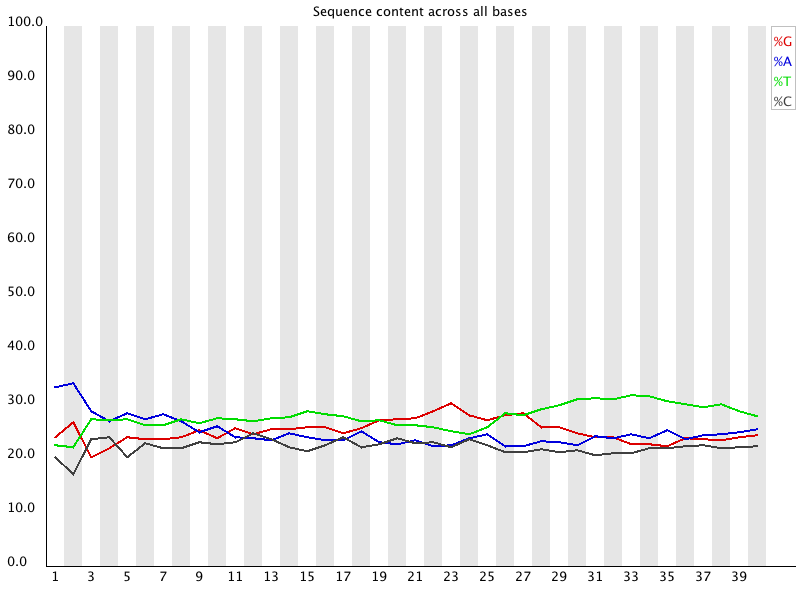</center>
<br>

- [**Per sequence GC content**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/5%20Per%20Sequence%20GC%20Content.html)
  - comparison curves of a normal distribution of GC content and what was observed in the data
    - where the x-axis is mean GC content, and the y-axis is number of reads

<center>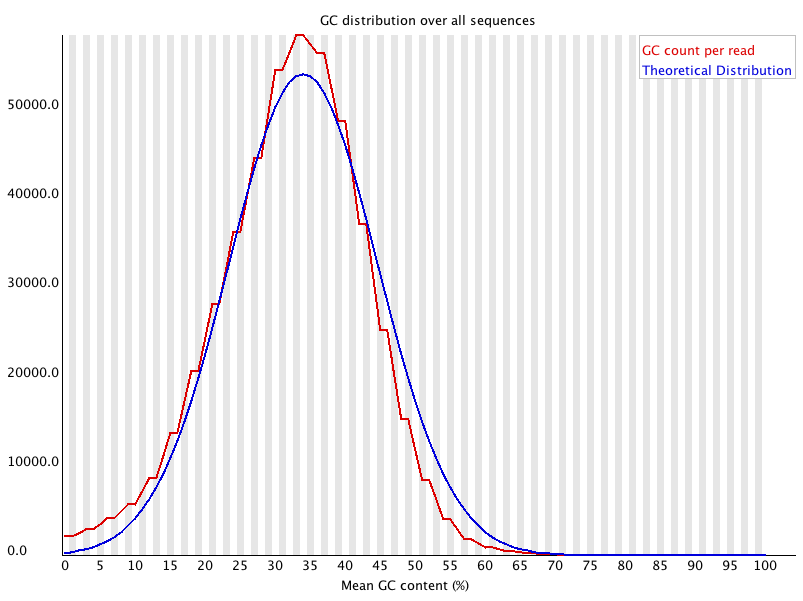</center>
<br>

- [**Per base N content**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/6%20Per%20Base%20N%20Content.html)
  - a plot depicting the frequency and location of Ns (which can be assigned when a base is uncertain)
<br>

- [**Sequence length distribution**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/7%20Sequence%20Length%20Distribution.html)
  - a plot showing the distribution of read lengths
<br>

- [**Sequence duplication levels**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/8%20Duplicate%20Sequences.html)
  - a plot showing the proportion of sequences detected in differing duplication levels
    - where the x-axis represents duplication level, the y-axis the percent of sequences at the given duplication level, the blue line represents the starting data, and the red line represents after some form of deduplication

<center>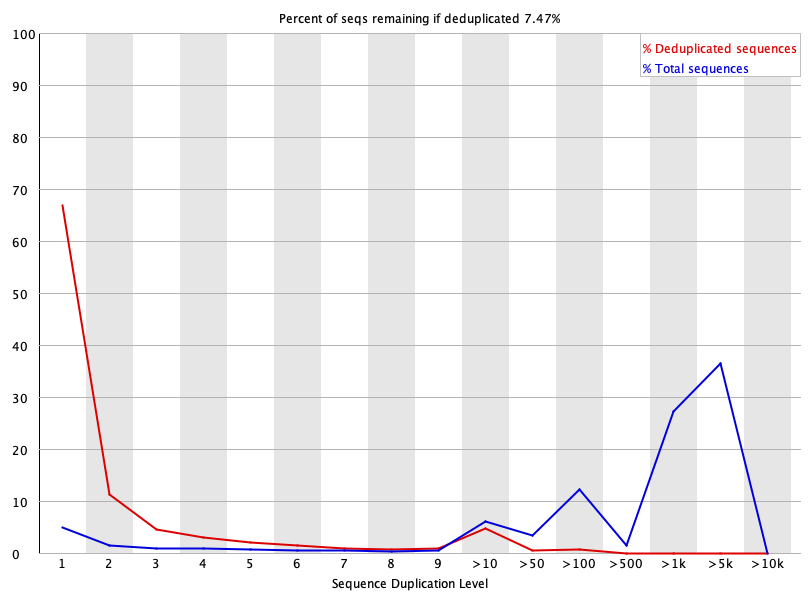</center>
<br>

- [**Overrepresented sequences**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/9%20Overrepresented%20Sequences.html)
  - a list of any sequences that make up more than 0.1% of the total

- [**Adapter content**](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/10%20Adapter%20Content.html)
  - common adapters are searched and reported if found

<center>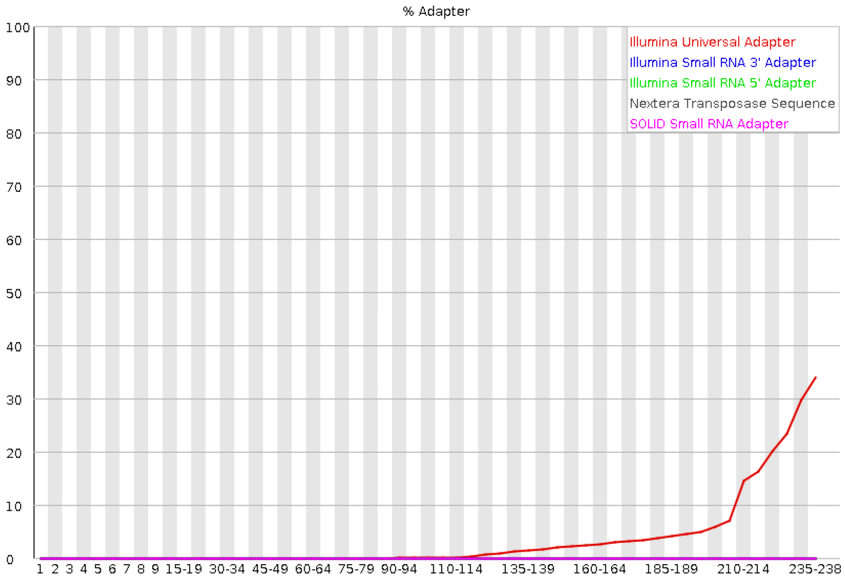</center>
<br>

**Looking at this last adapter content image:**

1. Do you think this should be considered when quality trimming our data? Why or why not?

<div class="alert alert-block alert-success">
<details>
<summary><b>Solution</b></summary>

<br>

Yes. Adapters are not biological, so we'd want to be sure they were removed in the quality filtering step.

</details>
</div>

These modules are summarized in an html report in a Pass (green check), Warning (yellow exclamation point), and Fail (red X) fashion. 

**It is important to note that although these modules are summarized in a pass/fail fashion, those indicators are based on expecting the input sequencing data are completely random and diverse, which is often not the case depending on the type of sequencing that was done.** 

For instance, if our data represents the targeted sequencing of one gene type (referred to as amplicon sequencing), this is not a random and diverse set of sequences, and some of these modules might be assessed as "Fail", e.g.:

<center>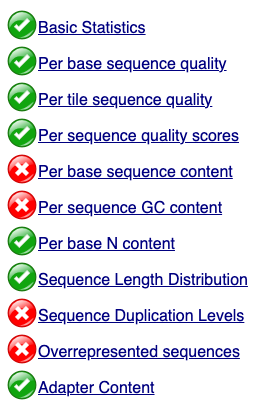</center>
<br>

Due to the nature of most amplicon sequencing datasets being many copies of the same target genes, it is expected that those particular modules might fail. So seeing them marked as "Fail" by FastQC doesn't by itself mean there is necessarily anything wrong with our data. 

Frequently, the common causes for a particular module to fail or have a warning are noted in the [documentation pages](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/), so it can help to begin looking there if unsure.

<div class="alert alert-block alert-info">

FastQC provides a powerful way to summarize the quality of our data, but it's important to interpret its results within the context of what type of data we are working with.

</div>


---
---

[**Previous:** 3. R intro](03-R-intro.ipynb)
<br>

<div style="text-align: right"><a href="../00-overview.ipynb"><b>Back to:</b> Overview</a></div>
